In [16]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import clmm
import galsim
import numpy as np
import descwl_shear_sims as dss
import matplotlib.pyplot as plt

from descwl_shear_sims.galaxies import WLDeblendGalaxyCatalog
from descwl_shear_sims.objlists import get_objlist
from descwl_shear_sims.surveys import get_survey

In [2]:
cosmo = clmm.Cosmology(H0=70.0, Omega_dm0=0.27 - 0.045, Omega_b0=0.045, Omega_k0=0.0)
halo = clmm.Modeling(massdef="mean", delta_mdef=200, halo_profile_model="nfw")
halo.set_cosmo(cosmo)
halo.set_concentration(4)
halo.set_mass(1.0e15)
z_cl = 1.0
# source properties
z_source = 2.0  # all sources in the same plane

shear_obj = dss.shear.ShearNFW(halo, z_cl)

# step1: make sure the direction is correct

In [4]:
# generate positions
radius = 50 # arcsec
n_gal = 20
theta = np.linspace(0, 360, n_gal) / n_gal
x = np.cos(theta) * radius
y = np.sin(theta) * radius
shifts = np.zeros(n_gal, dtype=[('dx', 'f8'), ('dy', 'f8')])
shifts['dx'] = x
shifts['dy'] = y

shift_list = []
for ss in shifts:
    shift_list.append(galsim.PositionD(ss['dx'], ss['dy']))

# get the shear
shear_list = []
for ss in shift_list:
    shear_list.append(shear_obj.get_shear(z_source, ss))

In [5]:
gamma = []
for ss in shear_list:
    gamma.append(ss.g1 + 1j * ss.g2) 
gamma = np.array(gamma)

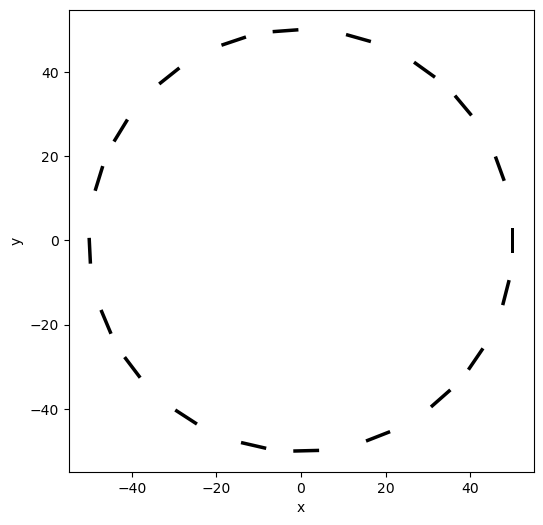

In [6]:
angles = np.angle(gamma, deg=True) / 2.
lengths = np.abs(gamma) * 100.

# Create whisker plot
plt.figure(figsize=(6, 6))
plt.quiver(x, y, np.cos(np.deg2rad(angles)), np.sin(np.deg2rad(angles)),
           color="black", headaxislength=0, headlength=0, headwidth=1, pivot = 'middle')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# step2: make sure the amplitude is correct

In [7]:
n_gal = 1
d_array = []
g_array = []
for i in range(10):
    position = galsim.PositionD(3.0 ** i, 0.)
    # get the shear
    shear = shear_obj.get_shear(z_source, position)
    g1 = shear.g1
    g2 = shear.g2
    gabs = np.abs(g1 + 1j * g2)
    d_array.append(3 ** i)
    g_array.append(gabs)
d_array = np.array(d_array)
g_array = np.array(g_array)

Text(0, 0.5, '$|g|$')

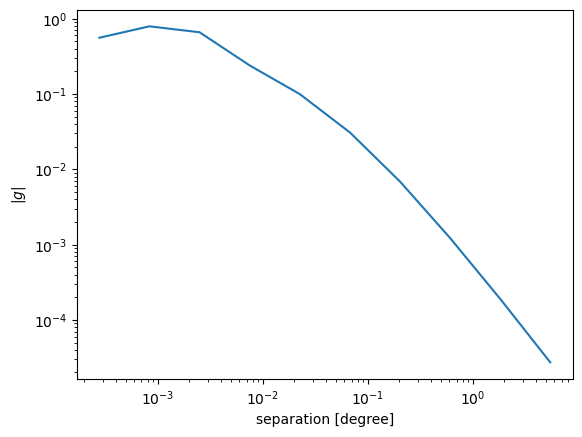

In [9]:
plt.plot(d_array / 3600., g_array)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("separation [degree]")
plt.ylabel(r"$|g|$")
# We set kappa_max to 0.8

In [44]:
band="r"
rng = np.random.RandomState(1)
coadd_dim = 500
buff = 50
# galaxy catalog; you can make your own
galaxy_catalog = WLDeblendGalaxyCatalog(
    rng=rng,
    coadd_dim=coadd_dim,
    buff=buff,
    layout="random",
)

survey = get_survey(gal_type=galaxy_catalog.gal_type, band=band)
noise_for_gsparams = survey.noise
lists = get_objlist(
    galaxy_catalog=galaxy_catalog,
    survey=survey,
    star_catalog=None,
    noise=noise_for_gsparams,
)

In [45]:
lists.keys()

dict_keys(['objlist', 'shifts', 'redshifts', 'star_objlist', 'star_shifts', 'bright_objlist', 'bright_shifts', 'bright_mags'])

In [46]:
lists["redshifts"]

[0.300422102213,
 0.652480721474,
 0.575277209282,
 2.52627205849,
 1.45767605305,
 3.21435308456,
 1.43933665752,
 0.602639317513,
 0.351592004299,
 1.4857083559,
 1.23648571968,
 2.45936989784,
 1.65149867535,
 1.95639693737,
 0.673706114292,
 1.33176410198,
 0.832303106785,
 1.23708331585,
 2.74137616158,
 0.478885412216,
 1.71309113503,
 3.10937333107,
 1.58497214317,
 1.53414404392,
 2.21907281876,
 3.05395698547,
 0.624157905579,
 2.48969173431,
 1.65923559666,
 1.72423791885,
 1.72161865234,
 1.41527807713,
 1.9740653038,
 1.57185637951,
 1.36203336716,
 0.998158812523,
 2.22123336792,
 0.0790505036712,
 1.54114544392,
 1.28051483631,
 0.633835613728,
 0.935597300529,
 2.90864443779,
 0.397633910179,
 1.96410322189,
 2.22879934311,
 0.681291222572,
 2.69742965698,
 0.310196310282,
 2.89895749092,
 1.48319602013,
 1.25393915176,
 1.32725834846,
 1.49158430099,
 1.06035864353,
 2.03195810318,
 1.80608427525,
 0.736506402493,
 1.11696577072,
 0.290101289749,
 0.578349113464,
 1.819